# Daily-Dose-of-Data-Science

[Daily Dose of Data Science](https://avichawla.substack.com) is a publication on Substack that brings together intriguing frameworks, libraries, technologies, and tips that make the life cycle of a Data Science project effortless. 

Author: Avi Chawla

[Medium](https://medium.com/@avi_chawla) | [LinkedIn](https://www.linkedin.com/in/avi-chawla/)

# Visualise The Change In Rank Over Time With Bump Charts

Post Link: [Substack](https://avichawla.substack.com/p/visualise-the-change-in-rank-over)

LinkedIn Post: [LinkedIn](https://www.linkedin.com/feed/update/urn:li:share:7058002758037049345/)

Twitter Post: [Twitter](https://twitter.com/_avichawla/status/1652237062148440064)

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

## Data

In [3]:
categories = ['A', 'B', 'C', 'D', 'E']
time_periods = [2010, 2011, 2012, 2013]

data = np.array([[1, 1, 2, 1],
                 [1, 1, 2, 5],
                 [5, 3, 2, 3],
                 [2, 4, 2, 4],
                 [4, 1, 5, 5]])

In [4]:
# Calculate rank for each category over time
ranks = np.argsort(data, axis=0)[::-1]
rank_data = np.zeros_like(data)
for i in range(len(time_periods)):
    rank_data[:, i] = ranks[:, i] + 1
    
rank_data

array([[3, 4, 5, 5],
       [5, 3, 4, 2],
       [4, 5, 3, 4],
       [2, 2, 2, 3],
       [1, 1, 1, 1]])

## Bar chart

In [5]:
df = pd.DataFrame(6-rank_data.T,
                  columns=[str(i) for i in categories])
df["Time"] = time_periods

2023-04-29 14:23:50,384 [62644] WARNING  py.warnings:109: [JupyterRequire] /var/folders/3w/0h9rv7rx7zq40g17g_bqrxvc0000gn/T/ipykernel_62644/2504304549.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(["",5,4,3,2,1])



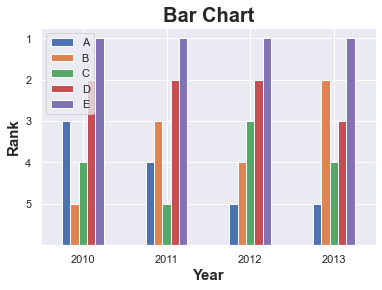

In [7]:
fig, ax = plt.subplots()

fig=df.plot(x='Time', kind='bar', stacked=False, ax = ax);

ax.set_xlabel('Year', fontsize = 15, fontweight="bold")
ax.set_ylabel('Rank', fontsize = 15, fontweight="bold")
ax.set_title('Bar Chart', fontsize = 20, fontweight="bold")
ax.set_xticklabels(df.Time, rotation = 0)
ax.set_yticklabels(["",5,4,3,2,1])

plt.show();

## Bump chart

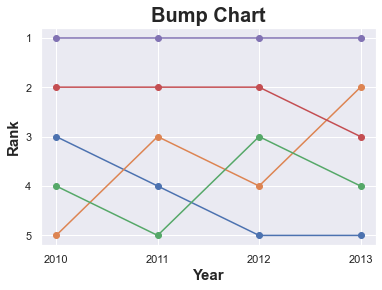

In [8]:
# Plot bump chart
fig, ax = plt.subplots()
for i, cat in enumerate(categories):
    ax.plot(time_periods, rank_data[i], label=cat, marker = "o")
    
ax.invert_yaxis()
ax.set_xlabel('Year', fontsize = 15, fontweight="bold")
ax.set_ylabel('Rank', fontsize = 15, fontweight="bold")
ax.set_title('Bump Chart', fontsize = 20, fontweight="bold")

ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))
ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))

plt.show()